## 1. Data Splitting

In [1]:
import pandas as pd
import gzip

# Read from the GZ file
with gzip.open('cleaned_crime_data.csv.gz', 'rt') as f:
    df = pd.read_csv(f)

# Display the first 10 rows of the dataset
df.head(10)

,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,...,"Premis Desc_VEHICLE STORAGE LOT (CARS, TRUCKS, RV'S, BOATS, TRAILERS, ETC.)","Premis Desc_VEHICLE, PASSENGER/TRUCK",Premis Desc_VETERINARIAN/ANIMAL HOSPITAL,Premis Desc_VIDEO RENTAL STORE,Premis Desc_VISION CARE FACILITY*,Premis Desc_WAREHOUSE,Premis Desc_WATER FACILITY,Premis Desc_WEBSITE,Premis Desc_YARD (RESIDENTIAL/BUSINESS),Holiday
0,03/01/2020 12:00:00 AM,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,...,False,False,False,False,False,False,False,False,False,0
1,02/09/2020 12:00:00 AM,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,...,False,False,False,False,False,False,False,False,False,0
2,11/11/2020 12:00:00 AM,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,...,False,False,False,False,False,False,False,False,False,0
3,05/10/2023 12:00:00 AM,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,...,False,False,False,False,False,False,False,False,False,0
4,08/18/2022 12:00:00 AM,2020-08-17,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,1822 1501 0930 2004,...,False,False,False,False,False,False,False,False,False,0
5,04/04/2023 12:00:00 AM,2020-12-01,2300,18,Southeast,1826,2,354,THEFT OF IDENTITY,1822 0100 0930 0929,...,False,False,False,False,False,False,False,False,False,0
6,04/04/2023 12:00:00 AM,2020-07-03,900,1,Central,182,2,354,THEFT OF IDENTITY,0930 0929,...,False,False,False,False,False,False,False,False,False,1
7,07/22/2022 12:00:00 AM,2020-05-12,1110,3,Southwest,303,2,354,THEFT OF IDENTITY,0100,...,False,False,False,False,False,False,False,False,False,0
8,04/28/2023 12:00:00 AM,2020-12-09,1400,13,Newton,1375,2,354,THEFT OF IDENTITY,0100,...,False,False,False,False,False,False,False,False,False,0
9,12/31/2020 12:00:00 AM,2020-12-31,1220,19,Mission,1974,2,624,BATTERY - SIMPLE ASSAULT,0416,...,False,False,False,False,False,False,False,False,False,0


Loading dataset...
Dataset loaded.
Preparing data...
Data prepared.
Splitting data...

Data Split Statistics:
Total samples: 973554
Training samples: 681487 (70.0%)
Test samples: 292067 (30.0%)

Class distribution in full dataset:
Crm Cd
510    0.111932
624    0.076223
330    0.062601
354    0.062195
740    0.060916
         ...   
830    0.000006
904    0.000005
906    0.000004
884    0.000004
445    0.000004
Name: proportion, Length: 138, dtype: float64

Class distribution in training set:
Crm Cd
510    0.111932
624    0.076223
330    0.062600
354    0.062195
740    0.060915
         ...   
904    0.000006
349    0.000006
445    0.000004
884    0.000004
906    0.000004
Name: proportion, Length: 138, dtype: float64

Class distribution in test set:
Crm Cd
510    0.111933
624    0.076222
330    0.062602
354    0.062195
740    0.060918
         ...   
452    0.000007
884    0.000003
445    0.000003
904    0.000003
906    0.000003
Name: proportion, Length: 138, dtype: float64
Data split c

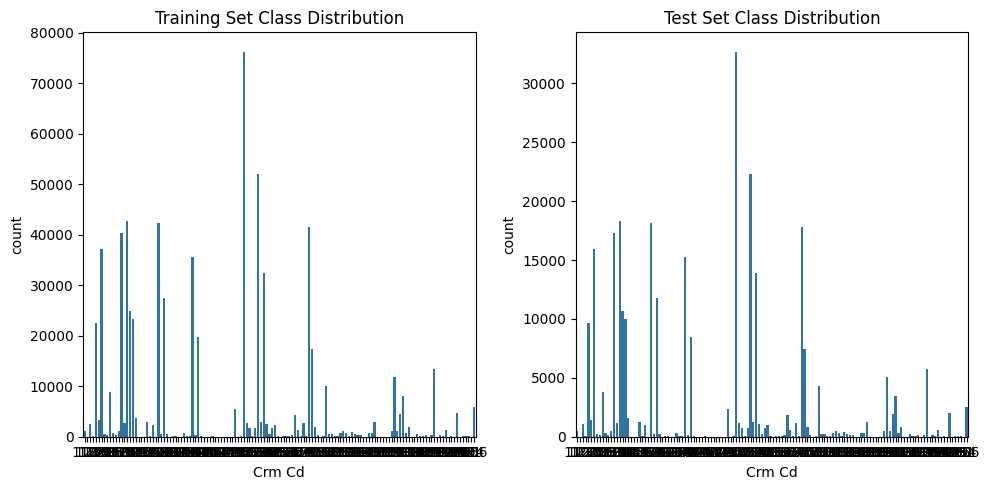

In [10]:
import pandas as pd
import gzip
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

def prepare_data(df):
    print("Preparing data...")
    # Select features for modeling
    feature_cols = [
        'AREA',
        'Rpt Dist No',
        'Premis Desc_VEHICLE STORAGE LOT (CARS, TRUCKS, RV\'S, BOATS, TRAILERS, ETC.)',
        'Premis Desc_VEHICLE, PASSENGER/TRUCK',
        'Premis Desc_VETERINARIAN/ANIMAL HOSPITAL',
        'Premis Desc_VIDEO RENTAL STORE',
        'Premis Desc_VISION CARE FACILITY*',
        'Premis Desc_WAREHOUSE',
        'Premis Desc_WATER FACILITY',
        'Premis Desc_WEBSITE',
        'Premis Desc_YARD (RESIDENTIAL/BUSINESS)',
        'Holiday'
    ]
    
    # Prepare X (features) and y (target)
    X = df[feature_cols]
    y = df['Crm Cd']
    
    # Filter out classes with fewer than 2 samples
    class_counts = y.value_counts()
    valid_classes = class_counts[class_counts >= 2].index
    X = X[y.isin(valid_classes)]
    y = y[y.isin(valid_classes)]
    
    print("Data prepared.")
    return X, y

# 2. Split data and show statistics
def split_and_show_stats(X, y, test_size=0.3, random_state=42):
    print("Splitting data...")
    # Perform stratified split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=test_size, 
        random_state=random_state,
        stratify=y
    )
    
    # Calculate and display statistics
    print("\nData Split Statistics:")
    print(f"Total samples: {len(X)}")
    print(f"Training samples: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
    print(f"Test samples: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")
    
    print("\nClass distribution in full dataset:")
    print(y.value_counts(normalize=True))
    
    print("\nClass distribution in training set:")
    print(y_train.value_counts(normalize=True))
    
    print("\nClass distribution in test set:")
    print(y_test.value_counts(normalize=True))
    
    print("Data split completed.")
    return X_train, X_test, y_train, y_test

# 3. Create cross-validation splits
def create_cv_splits(X_train, y_train, n_splits=5):
    print("Creating cross-validation splits...")
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    print("Cross-validation splits created.")
    return skf

# 4. Preprocess features
def preprocess_features(X_train, X_test):
    print("Preprocessing features...")
    # Create scaler
    scaler = StandardScaler()
    
    # Fit and transform training data
    X_train_scaled = scaler.fit_transform(X_train)
    
    # Transform test data
    X_test_scaled = scaler.transform(X_test)
    
    print("Features preprocessed.")
    return X_train_scaled, X_test_scaled, scaler

# Main execution
def main():
    print("Loading dataset...")
    # Load the cleaned dataset
    file_path = 'cleaned_crime_data.csv.gz'
    with gzip.open(file_path, 'rt') as f:
        df = pd.read_csv(f)
    print("Dataset loaded.")

    # 1. Prepare the data
    X, y = prepare_data(df)

    # 2. Split the data and show statistics
    X_train, X_test, y_train, y_test = split_and_show_stats(X, y)

    # 3. Create cross-validation splits
    cv = create_cv_splits(X_train, y_train)

    # 4. Preprocess features
    X_train_scaled, X_test_scaled, scaler = preprocess_features(X_train, X_test)
    
    # Visual confirmation of the split
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    sns.countplot(x=y_train)
    plt.title('Training Set Class Distribution')
    
    plt.subplot(1, 2, 2)
    sns.countplot(x=y_test)
    plt.title('Test Set Class Distribution')
    
    plt.tight_layout()
    plt.show()
    
    # Return processed datasets for modeling
    return X_train_scaled, X_test_scaled, y_train, y_test, cv

if __name__ == "__main__":
    X_train_scaled, X_test_scaled, y_train, y_test, cv = main()


## 2. Experiment with k-NN Classification Model



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

def knn_classification(X_train_scaled, y_train, X_test_scaled, y_test, cv, k_values):
    best_k = 0
    best_score = 0
    knn_scores = []
    
    # Loop through different k values
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        
        # Perform cross-validation
        cv_scores = []
        for train_index, val_index in cv.split(X_train_scaled, y_train):
            X_cv_train, X_cv_val = X_train_scaled[train_index], X_train_scaled[val_index]
            y_cv_train, y_cv_val = y_train.iloc[train_index], y_train.iloc[val_index]
            
            # Train and evaluate model
            knn.fit(X_cv_train, y_cv_train)
            y_pred_cv = knn.predict(X_cv_val)
            score = accuracy_score(y_cv_val, y_pred_cv)
            cv_scores.append(score)
        
        # Average cross-validation score
        avg_cv_score = np.mean(cv_scores)
        knn_scores.append((k, avg_cv_score))
        
        # Update best model if current k has a higher score
        if avg_cv_score > best_score:
            best_score = avg_cv_score
            best_k = k
    
    # Train the final model with the best k
    print(f"Best k found: {best_k} with cross-validation score: {best_score}")
    knn_final = KNeighborsClassifier(n_neighbors=best_k)
    knn_final.fit(X_train_scaled, y_train)
    
    # Test the final model
    y_pred_test = knn_final.predict(X_test_scaled)
    print("k-NN Test Accuracy:", accuracy_score(y_test, y_pred_test))
    print("Classification Report for k-NN:")
    print(classification_report(y_test, y_pred_test))
    
    return knn_scores

# Step 3: Call the function to experiment with k values
k_values = [3, 5, 7, 9, 11]  # Try different k values
knn_scores = knn_classification(X_train_scaled, y_train, X_test_scaled, y_test, cv, k_values)


## 3. Experiment with Naïve Bayes Classification Model



In [ ]:
from sklearn.naive_bayes import GaussianNB

# 7. Naive Bayes Classification Model
def naive_bayes_classification(X_train, X_test, y_train, y_test):
    nb_model = GaussianNB()
    
    # Train the model
    nb_model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = nb_model.predict(X_test)
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Naïve Bayes accuracy: {accuracy:.4f}")
    
    return nb_model

# 8. Test the final Naïve Bayes model
def test_naive_bayes_model(nb_model, X_test, y_test):
    y_pred = nb_model.predict(X_test)
    
    # Print classification report
    print("\nClassification Report for the Naïve Bayes model:")
    print(classification_report(y_test, y_pred))

# Main execution for Naïve Bayes
def run_naive_bayes():
    X_train_scaled, X_test_scaled, y_train, y_test, cv = main()
    
    # Run Naive Bayes classification
    nb_model = naive_bayes_classification(X_train_scaled, X_test_scaled, y_train, y_test)
    
    # Test the Naïve Bayes model
    test_naive_bayes_model(nb_model, X_test_scaled, y_test)

# Call the function to execute Naïve Bayes classification
run_naive_bayes()

## 4. Experiment with Logistic Regression Classification Model



Preparing data...
Data prepared.
Splitting data...

Data Split Statistics:
Total samples: 973554
Training samples: 681487 (70.0%)
Test samples: 292067 (30.0%)

Class distribution in full dataset:
Crm Cd
510    0.111932
624    0.076223
330    0.062601
354    0.062195
740    0.060916
         ...   
830    0.000006
904    0.000005
906    0.000004
884    0.000004
445    0.000004
Name: proportion, Length: 138, dtype: float64

Class distribution in training set:
Crm Cd
510    0.111932
624    0.076223
330    0.062600
354    0.062195
740    0.060915
         ...   
904    0.000006
349    0.000006
445    0.000004
884    0.000004
906    0.000004
Name: proportion, Length: 138, dtype: float64

Class distribution in test set:
Crm Cd
510    0.111933
624    0.076222
330    0.062602
354    0.062195
740    0.060918
         ...   
452    0.000007
884    0.000003
445    0.000003
904    0.000003
906    0.000003
Name: proportion, Length: 138, dtype: float64
Data split completed.
Creating cross-validation

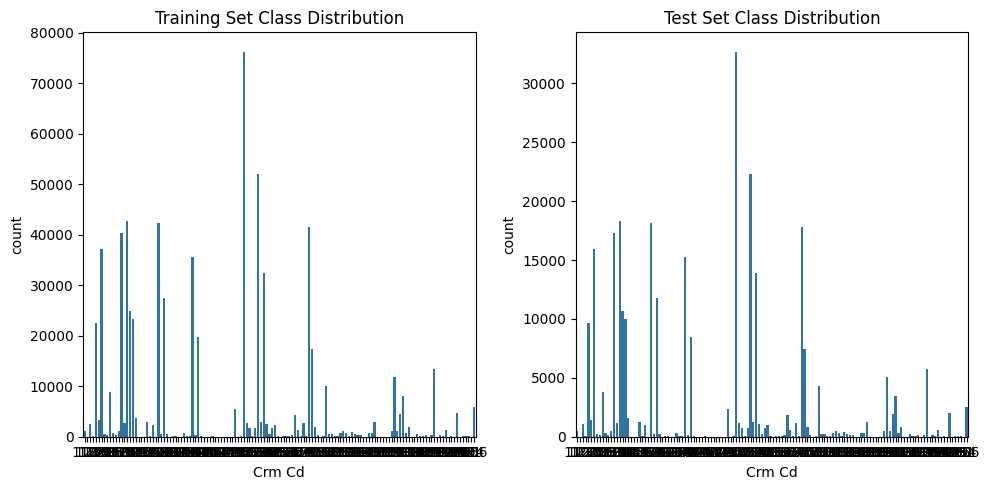

Cross-Validation Performance Metrics:
Accuracy: 0.1322 ± 0.0003
Precision: 0.1268 ± 0.0048
Recall: 0.1322 ± 0.0003
F1-Score: 0.0520 ± 0.0003
AUC ROC: 0.5451 ± 0.0082

Final Test Performance Metrics:
Accuracy: 0.1320
Precision: 0.1286
Recall: 0.1320
F1-Score: 0.0518
AUC ROC: 0.5571


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.impute import SimpleImputer  # Import SimpleImputer
from sklearn.pipeline import Pipeline  # Import Pipeline
import numpy as np  # Import numpy
import pandas as pd
import gzip
import seaborn as sns
import matplotlib.pyplot as plt

# Main execution
def main():
    # Load the cleaned dataset
    file_path = 'cleaned_crime_data.csv.gz'
    with gzip.open(file_path, 'rt') as f:
        df = pd.read_csv(f)

    # 1. Prepare the data
    X, y = prepare_data(df)

    # 2. Split the data and show statistics
    X_train, X_test, y_train, y_test = split_and_show_stats(X, y)

    # 3. Create cross-validation splits
    cv = create_cv_splits(X_train, y_train, n_splits=3)  # Adjust n_splits to 3

    # 4. Preprocess features
    X_train_scaled, X_test_scaled, scaler = preprocess_features(X_train, X_test)
    
    # Visual confirmation of the split
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    sns.countplot(x=y_train)
    plt.title('Training Set Class Distribution')
    
    plt.subplot(1, 2, 2)
    sns.countplot(x=y_test)
    plt.title('Test Set Class Distribution')
    
    plt.tight_layout()
    plt.show()
    
    # Return processed datasets for modeling
    return X_train_scaled, X_test_scaled, y_train, y_test, cv

if __name__ == "__main__":
    X_train_scaled, X_test_scaled, y_train, y_test, cv = main()

# 1. Setup and Cross-Validation
log_reg = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Add imputer to handle NaN values
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# 2. Evaluation Metrics Calculation
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

for train_index, val_index in cv.split(X_train_scaled, y_train):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    log_reg.fit(X_train_fold, y_train_fold)
    y_val_pred = log_reg.predict(X_val_fold)
    y_val_prob = log_reg.predict_proba(X_val_fold)
    
    accuracy_scores.append(accuracy_score(y_val_fold, y_val_pred))
    precision_scores.append(precision_score(y_val_fold, y_val_pred, average='weighted', zero_division=0))
    recall_scores.append(recall_score(y_val_fold, y_val_pred, average='weighted'))
    f1_scores.append(f1_score(y_val_fold, y_val_pred, average='weighted'))
    
    # Ensure y_val_prob has the correct dimensions
    if y_val_prob.shape[1] == len(np.unique(y_val_fold)):
        roc_auc_scores.append(roc_auc_score(y_val_fold, y_val_prob, multi_class='ovr'))
    else:
        roc_auc_scores.append(roc_auc_score(y_val_fold, y_val_prob[:, 0], multi_class='ovr'))

# 3. Performance Analysis
print("Cross-Validation Performance Metrics:")
print(f"Accuracy: {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
print(f"Precision: {np.mean(precision_scores):.4f} ± {np.std(precision_scores):.4f}")
print(f"Recall: {np.mean(recall_scores):.4f} ± {np.std(recall_scores):.4f}")
print(f"F1-Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
print(f"AUC ROC: {np.mean(roc_auc_scores):.4f} ± {np.std(roc_auc_scores):.4f}")

# 4. Best Model Selection
# Refit the model on the entire training set
log_reg.fit(X_train_scaled, y_train)

# 5. Final Test Evaluation
y_test_pred = log_reg.predict(X_test_scaled)
y_test_prob = log_reg.predict_proba(X_test_scaled)

final_accuracy = accuracy_score(y_test, y_test_pred)
final_precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
final_recall = recall_score(y_test, y_test_pred, average='weighted')
final_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Ensure y_test_prob has the correct dimensions
if y_test_prob.shape[1] == len(np.unique(y_test)):
    final_roc_auc = roc_auc_score(y_test, y_test_prob, multi_class='ovr')
else:
    final_roc_auc = roc_auc_score(y_test, y_test_prob[:, 0], multi_class='ovr')

print("\nFinal Test Performance Metrics:")
print(f"Accuracy: {final_accuracy:.4f}")
print(f"Precision: {final_precision:.4f}")
print(f"Recall: {final_recall:.4f}")
print(f"F1-Score: {final_f1:.4f}")
print(f"AUC ROC: {final_roc_auc:.4f}")

### Report of Logistic Regression

Cross-Validation Performance Metrics:
Accuracy: 0.1322 ± 0.0003
Precision: 0.1268 ± 0.0048
Recall: 0.1322 ± 0.0003
F1-Score: 0.0520 ± 0.0003
AUC ROC: 0.5451 ± 0.0082

Final Test Performance Metrics:
Accuracy: 0.1320
Precision: 0.1286
Recall: 0.1320
F1-Score: 0.0518
AUC ROC: 0.5571

Classification Report:
              precision    recall  f1-score   support

         110       0.00      0.00      0.00       468
         113       0.00      0.00      0.00         2
         121       0.00      0.00      0.00      1118
         122       0.00      0.00      0.00        95
         210       0.00      0.00      0.00      9648
         220       0.00      0.00      0.00      1449
         230       0.00      0.00      0.00     15940
         231       0.00      0.00      0.00       273
         235       0.00      0.00      0.00       183
         236       0.00      0.00      0.00      3793
         237       0.00      0.00      0.00       354
         250       0.00      0.00      0.00  

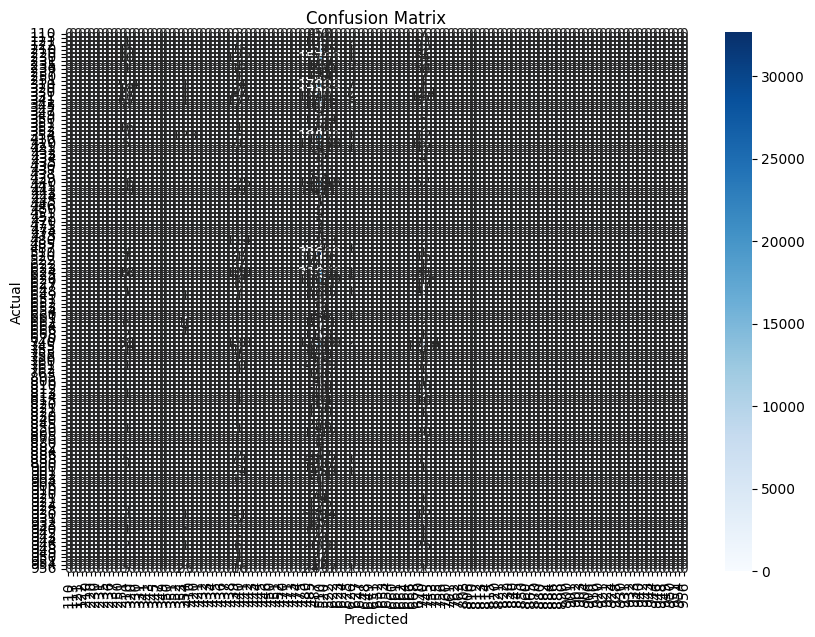

c:\Users\dimas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


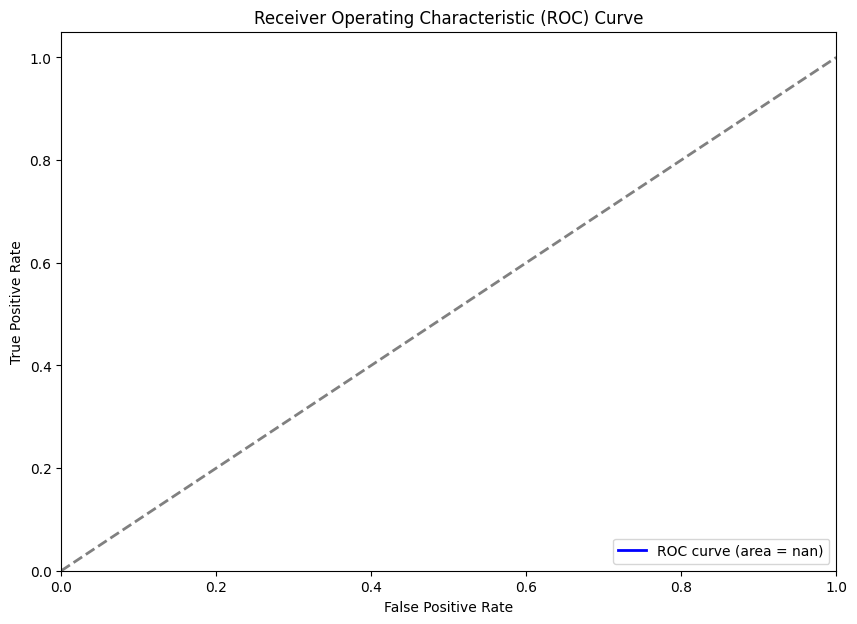

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Assuming X_train_scaled, y_train, X_test_scaled, y_test are already defined

# 1. Setup and Cross-Validation
log_reg = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# 2. Evaluation Metrics Calculation
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Adjust n_splits to avoid UserWarning
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, val_index in cv.split(X_train_scaled, y_train):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    log_reg.fit(X_train_fold, y_train_fold)
    y_val_pred = log_reg.predict(X_val_fold)
    y_val_prob = log_reg.predict_proba(X_val_fold)
    
    accuracy_scores.append(accuracy_score(y_val_fold, y_val_pred))
    precision_scores.append(precision_score(y_val_fold, y_val_pred, average='weighted', zero_division=0))
    recall_scores.append(recall_score(y_val_fold, y_val_pred, average='weighted'))
    f1_scores.append(f1_score(y_val_fold, y_val_pred, average='weighted'))
    
    # Ensure y_val_prob has the correct dimensions
    if y_val_prob.shape[1] == len(np.unique(y_val_fold)):
        roc_auc_scores.append(roc_auc_score(y_val_fold, y_val_prob, multi_class='ovr'))
    else:
        roc_auc_scores.append(roc_auc_score(y_val_fold, y_val_prob[:, 0], multi_class='ovr'))

# 3. Performance Analysis
print("Cross-Validation Performance Metrics:")
print(f"Accuracy: {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
print(f"Precision: {np.mean(precision_scores):.4f} ± {np.std(precision_scores):.4f}")
print(f"Recall: {np.mean(recall_scores):.4f} ± {np.std(recall_scores):.4f}")
print(f"F1-Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
print(f"AUC ROC: {np.mean(roc_auc_scores):.4f} ± {np.std(roc_auc_scores):.4f}")

# 4. Best Model Selection
# Refit the model on the entire training set
log_reg.fit(X_train_scaled, y_train)

# 5. Final Test Evaluation
y_test_pred = log_reg.predict(X_test_scaled)
y_test_prob = log_reg.predict_proba(X_test_scaled)

final_accuracy = accuracy_score(y_test, y_test_pred)
final_precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
final_recall = recall_score(y_test, y_test_pred, average='weighted')
final_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Ensure y_test_prob has the correct dimensions
if y_test_prob.shape[1] == len(np.unique(y_test)):
    final_roc_auc = roc_auc_score(y_test, y_test_prob, multi_class='ovr')
else:
    final_roc_auc = roc_auc_score(y_test, y_test_prob[:, 0], multi_class='ovr')

print("\nFinal Test Performance Metrics:")
print(f"Accuracy: {final_accuracy:.4f}")
print(f"Precision: {final_precision:.4f}")
print(f"Recall: {final_recall:.4f}")
print(f"F1-Score: {final_f1:.4f}")
print(f"AUC ROC: {final_roc_auc:.4f}")

# 6. Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, zero_division=0))

# 7. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 8. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob[:, 1], pos_label=2)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## 5. Experiment with SVM Classification Model



## 6. Experiment with Decision Tree (DT) Classification Model



## 7. Experiment with Back Propagation Neural Network (BPNN) Classification Model